In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

,November_3,May_4,May_9,June_5,May_3,May_8,June_4,April_5,October_2,October_4,...,November_2,April_10,June_3,June,March_2,May_10,April_11,September_2,August_5,March
0,0.092858,0.065741,-0.337310,-0.507901,0.033686,-0.676793,0.111761,-0.570061,-0.412551,0.573017,...,-0.320802,0.895416,0.230843,-0.168352,0.035974,-0.316977,0.452433,-0.390002,-0.452718,-0.757398
1,0.092858,0.061658,-0.290004,-0.507901,-0.016299,-0.213397,0.111761,-0.610055,-0.412551,0.573017,...,-0.320802,1.300786,0.230843,-0.168352,0.101229,-0.567900,0.623136,-0.390002,-0.452718,-0.265365
2,-0.144591,0.022404,-0.085953,-0.343425,-0.463674,0.376218,0.628831,-0.464105,-0.571485,0.421335,...,-0.348055,0.701837,0.501630,0.125726,0.557416,-0.911579,0.580641,-0.159893,-0.035065,-0.573106
3,0.211338,0.277889,-0.161828,-0.256383,-0.300338,-0.143403,0.361572,-0.464851,-0.448710,0.386922,...,-0.386133,0.630869,0.377077,-0.142361,-0.233336,-0.527982,0.525450,-0.261131,-0.200713,-0.307580
4,0.227199,0.221217,-0.055905,-0.333727,-0.444215,0.515070,0.131819,-0.112498,0.001682,0.270147,...,0.056329,0.505675,0.365047,-0.087405,0.117730,-0.697662,0.386678,-0.268855,-0.131263,-0.411646
5,0.489400,0.055913,-0.202906,-0.301398,-0.054209,-0.538951,-0.396615,-0.461749,-0.277161,0.800699,...,-0.281534,0.409039,0.859266,0.317621,0.042740,-0.653776,0.740051,-0.377147,-0.263126,-0.320803
6,0.126746,0.217356,-0.197503,-0.443026,-0.288842,0.322864,0.469586,-0.608293,0.042359,0.603446,...,-0.187166,0.765664,0.169173,0.163579,0.215333,-0.697543,0.222575,0.010914,0.328465,-0.622488
7,0.238995,-0.190489,-0.571212,-0.247822,-0.170438,-0.214216,0.179807,0.068665,-0.477413,0.724402,...,0.043008,0.565767,0.340634,0.534963,0.224397,-0.525066,0.270515,-0.300136,-0.502770,-0.614389
8,0.179015,0.263546,-0.407680,-0.469433,-0.436033,0.160824,0.577831,-0.408084,0.018532,0.516885,...,-0.529601,1.118693,0.027015,-0.400452,-0.130707,-1.384778,0.732969,-0.007257,0.054681,-0.759658
9,0.141883,-0.104601,-0.403877,-0.512329,-0.333610,-0.016718,0.507636,0.042054,0.080469,0.048390,...,-0.113452,0.090113,0.526172,0.230067,-0.062368,-0.709413,0.217513,-0.119027,-0.425538,-0.593971


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-9.64688492e-01, -3.31905370e-01,  3.83859397e-01,
        -7.81822933e-01,  6.18174203e-01, -2.44350980e+00,
        -1.17632735e+00, -7.98758908e-01, -7.17625970e-01,
         7.69690563e-01],
       [-9.64688492e-01, -3.44249872e-01,  6.33569553e-01,
        -7.81822933e-01,  3.60214219e-01, -9.50881838e-01,
        -1.17632735e+00, -9.02842518e-01, -7.17625970e-01,
         7.69690563e-01],
       [-2.40950299e+00, -4.62928215e-01,  1.71066054e+00,
         4.30341801e-01, -1.94857237e+00,  9.48306489e-01,
         4.58085133e-01, -5.23006144e-01, -1.22477942e+00,
         2.28928033e-01],
       [-2.43766668e-01,  3.09491841e-01,  1.31015467e+00,
         1.07182663e+00, -1.10563495e+00, -7.25425780e-01,
        -3.86697005e-01, -5.24949026e-01, -8.33006956e-01,
         1.06241297e-01],
       [-1.47255028e-01,  1.38150419e-01,  1.86927352e+00,
         5.01812574e-01, -1.84814799e+00,  1.39555697e+00,
        -1.11292408e+00,  3.92054362e-01,  6.04181681e-01,
        -3.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.13320599,  0.51902901, -0.49191253,  0.19748644, -0.01166501,
         0.07713988,  1.46580226, -0.35384492, -0.3923079 ,  1.24510761],
       [ 0.28521327, -1.64900072, -1.19844819,  1.19170479,  1.18829611,
        -1.14044717, -1.61489126, -0.33915351, -1.06022384,  0.84341315],
       [ 0.172075  , -0.25896521,  0.10774594, -0.51067382, -0.03826249,
         0.4086727 , -0.86720025, -1.6967388 ,  0.21772653, -0.70157663],
       [-0.60872528, -1.40187958, -1.36799065,  1.15139561,  0.79739778,
        -0.59850366,  0.02806901,  1.27308293, -1.98546499, -0.46709875],
       [ 1.63103885,  0.08480577,  0.01954931, -0.45563463, -0.45629377,
         0.33965073,  0.77947473,  0.20679276, -0.56363319,  0.19001858],
       [-0.22525825,  1.53910041,  1.49919519,  0.34610784, -0.27325677,
        -0.6474504 ,  0.61931511,  0.3830751 , -1.73905521,  1.89095581],
       [-1.23717723, -0.25674317,  1.01598805, -0.75319284, -0.41595585,
        -0.31615794,  1.93027692,  1.40289248

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 28}
Best Score: 0.33867166103242763
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 7}
Best Score: 0.41495763639713745
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.3561807796609315
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.4323662952879174
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 32}
Best Score: 0.29417083308159336


In [13]:
y_pred_list

[array([ 0.02689436,  0.78795197, -0.09272058,  0.25963318,  0.0080918 ,
        -0.06376258, -0.14582462, -0.34072322, -0.26742733, -0.50838664,
        -0.35739596, -0.36371147, -0.12009788,  0.13394227,  0.75483776,
        -0.14377083]),
 array([ 0.15076335,  0.67317151, -0.2757261 ,  0.39030952, -0.23470563,
        -0.00417502, -0.22543132, -0.51728798, -0.43586669, -0.75720075,
        -0.33604202, -0.8183254 , -0.52899206, -0.30830159,  0.71195578,
         0.27853175]),
 array([-0.07688795,  0.45796627, -0.24117424,  0.22641918, -0.04240897,
        -0.13663976, -0.22615655, -0.42427989, -0.51946574, -0.45233887,
        -0.24087288, -0.45680135, -0.22937148,  0.32601111,  0.29596067,
        -0.05783466]),
 array([-0.22357614,  0.78208625, -0.11793223,  0.61541958,  0.05406758,
        -0.2798646 , -0.17646112, -0.46900413, -0.57115385, -0.47456362,
        -0.4261487 , -0.36872455, -0.3649425 ,  0.38077595,  0.80870513,
         0.2891453 ]),
 array([-0.17107152,  0.69468349

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7477725885147789,
 0.6479294197532862,
 0.4471680167023185,
 0.5609153274024126,
 0.8017373100663583]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+uwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 28}
Best Score: 0.33867166103242763
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 7}
Best Score: 0.41495763639713745
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.3561807796609315
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.4323662952879174
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 32}
Best Score: 0.29417083308159336


In [21]:
y_pred_list_rf

[array([ 0.02689436,  0.78795197, -0.09272058,  0.25963318,  0.0080918 ,
        -0.06376258, -0.14582462, -0.34072322, -0.26742733, -0.50838664,
        -0.35739596, -0.36371147, -0.12009788,  0.13394227,  0.75483776,
        -0.14377083]),
 array([ 0.15076335,  0.67317151, -0.2757261 ,  0.39030952, -0.23470563,
        -0.00417502, -0.22543132, -0.51728798, -0.43586669, -0.75720075,
        -0.33604202, -0.8183254 , -0.52899206, -0.30830159,  0.71195578,
         0.27853175]),
 array([-0.07688795,  0.45796627, -0.24117424,  0.22641918, -0.04240897,
        -0.13663976, -0.22615655, -0.42427989, -0.51946574, -0.45233887,
        -0.24087288, -0.45680135, -0.22937148,  0.32601111,  0.29596067,
        -0.05783466]),
 array([-0.22357614,  0.78208625, -0.11793223,  0.61541958,  0.05406758,
        -0.2798646 , -0.17646112, -0.46900413, -0.57115385, -0.47456362,
        -0.4261487 , -0.36872455, -0.3649425 ,  0.38077595,  0.80870513,
         0.2891453 ]),
 array([-0.17107152,  0.69468349

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7477725885147789,
 0.6479294197532862,
 0.4471680167023185,
 0.5609153274024126,
 0.8017373100663583]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+uwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/randomforest


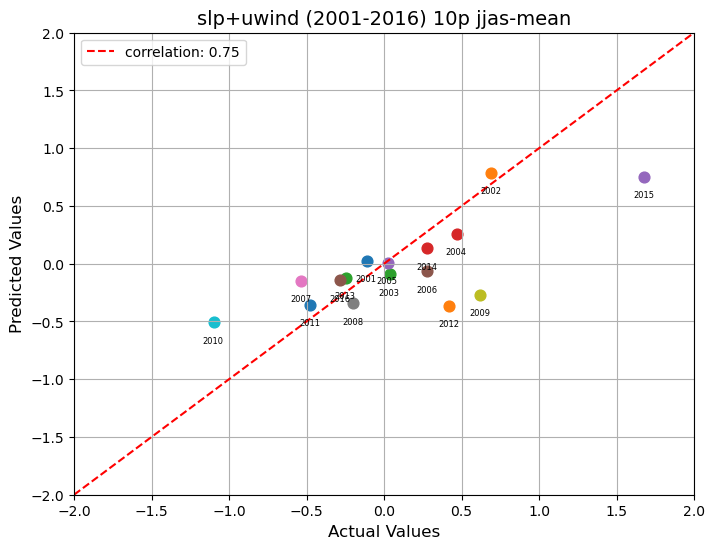

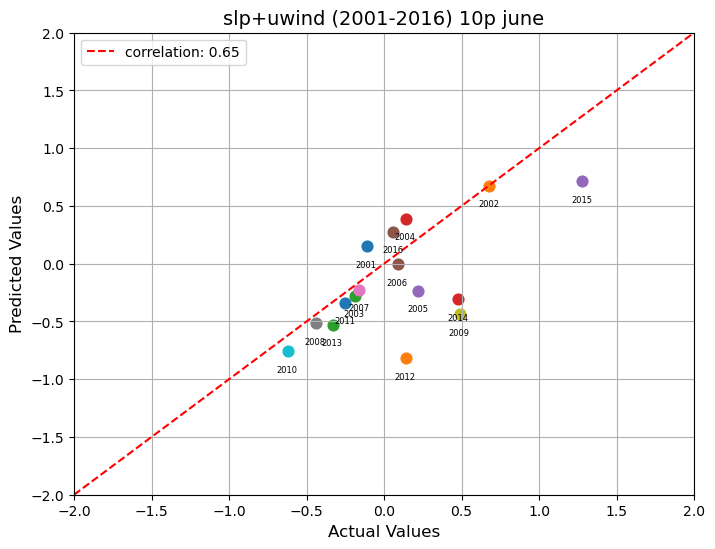

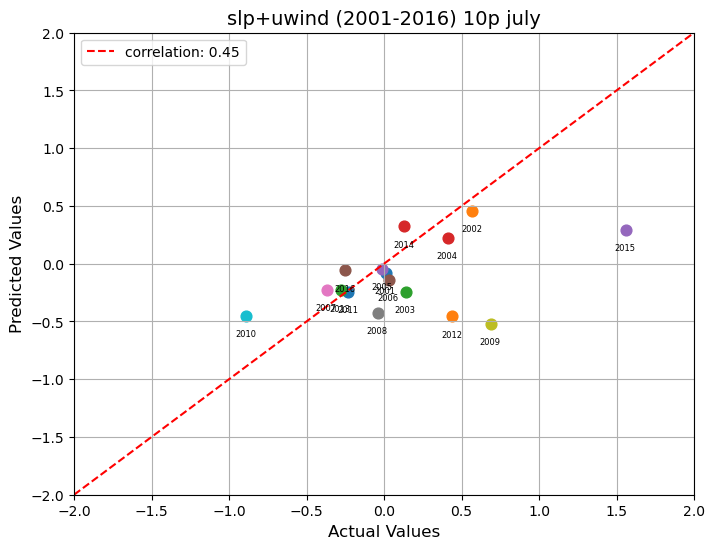

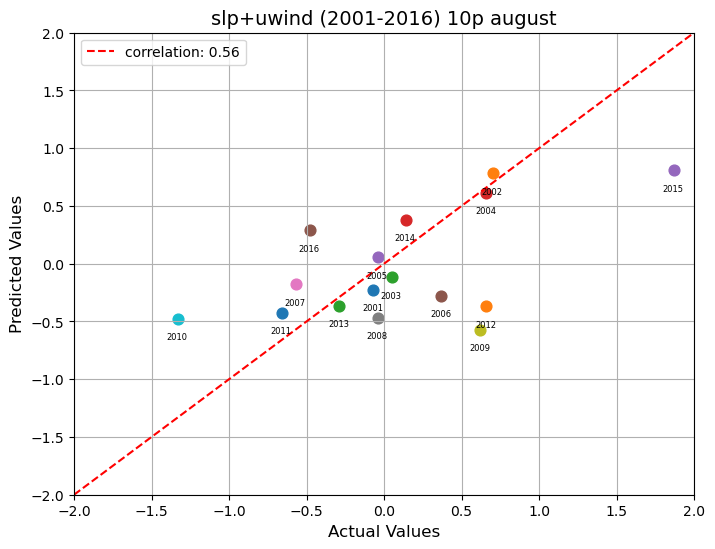

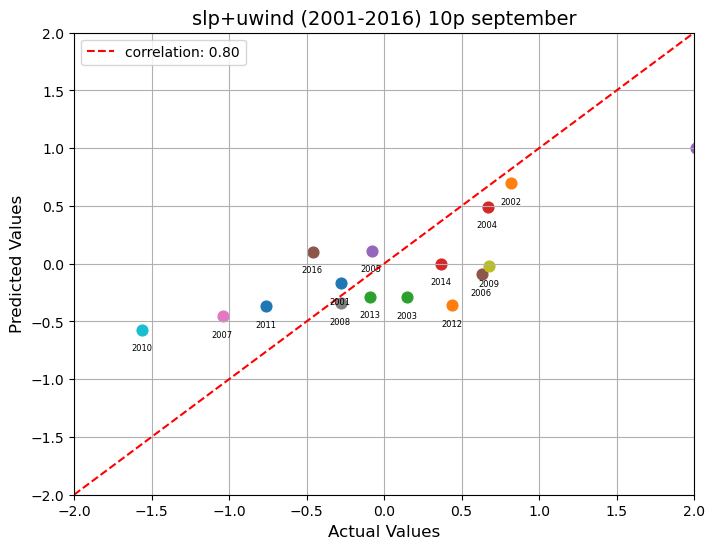

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show